# Clustering with DBSCAN Algorithm

# Challenge Session

###Task 1

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn.datasets import make_circles
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Loading Data

In [ ]:
df=pd.read_csv('/content/DS2_C6_S4_CarSales_Data_Challenge.csv')

##  Task 2: Preprocessing data

In [ ]:
(df.isna().sum()) 

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [ ]:
#structure of data
df.shape

(157, 16)

In [ ]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [ ]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [ ]:

#dropping year_resale_value column
df=df.drop('__year_resale_value',axis=1) # removing the field

In [ ]:
data_df=df

In [ ]:
#converting non int type to category
data_df['Manufacturer']=data_df['Manufacturer'].astype('category')
data_df['Model']=data_df['Model'].astype('category')
data_df['Vehicle_type']=data_df['Vehicle_type'].astype('category')
data_df['Latest_Launch']=data_df['Latest_Launch'].astype('category')

In [ ]:
# Label encoding
# categorical to numerical as the model works on numerical values
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data_df['Manufacturer_encode']= label_encoder.fit_transform(data_df['Manufacturer'])
data_df['Manufacturer_encode'].unique()

data_df['Model_encode']= label_encoder.fit_transform(data_df['Model'])
data_df['Model_encode'].unique()

data_df['Vehicle_type_encode']= label_encoder.fit_transform(data_df['Vehicle_type'])
data_df['Vehicle_type_encode'].unique()

data_df['Latest_Launch']= label_encoder.fit_transform(data_df['Latest_Launch'])
data_df['Latest_Launch'].unique()

array([ 47,  93,   9,  52,  20, 119,  50,  91,   7,  73,  25, 129,  57,
       101,  48,  72,  29, 128,  67, 109,  55,  79,  38,  15,  75, 122,
        65,  87,   3,  24,  95,  19,  82,  99,  43,  34,  96,  17,  88,
       118,  61,  10, 103,  27,  90, 120,  59,   8, 111,  36, 100, 127,
        70,  49, 123,   0, 108,  14,  78,  56,  21,  51, 121,  23,  85,
        66,  31,  60,  18,  33, 106,  74,  30,  58,  16, 114,  94,  39,
        68,  26, 113,  92,   4,  77,  35, 125, 102,  44,  12,  69,  98,
        84,  54,   2, 117, 105,  64,  42, 115, 110,  81,  62, 126,   5,
       112,  80,  63,  45, 124,  89,  71,  22,   6,  28,  86,  11,  76,
        46,  37,  97,  32,  83,  53,   1, 116,  41, 104,  40, 107,  13])

In [ ]:
#imputation based method to fill in missing values of each column
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = data_df.select_dtypes(include=numerics)
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=5)
#df_filled=imputer.fit_transform(new_df).toseries()
df_filled = pd.DataFrame(imputer.fit_transform(new_df),columns=new_df.columns)
df_filled.columns

Index(['Sales_in_thousands', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor',
       'Manufacturer_encode', 'Model_encode', 'Vehicle_type_encode'],
      dtype='object')

In [ ]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
 numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
 new_data_df = df_filled.select_dtypes(include=numerics)
 
 if scale == 'minmax':
     scaler = MinMaxScaler()
 else:
     scaler = StandardScaler()
 df_scaled = pd.DataFrame(scaler.fit_transform(new_data_df.to_numpy()),columns=new_data_df.columns)
 return df_scaled

In [ ]:
# scaling the data using MinMax Scaling process
scale = 'MinMax' 
data_df_scaled=feature_scale(scale)
data_df_scaled
data_df1=data_df_scaled
data_df1.head(10)

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Manufacturer_encode,Model_encode,Vehicle_type_encode
0,-0.532042,-0.415046,-1.214376,-0.814043,-0.828562,-1.123975,-1.122039,-1.185695,-1.227193,0.984337,-0.459471,-0.754924,-1.694221,0.029623,0.594515
1,-0.200761,0.070066,0.134385,0.694470,0.080215,-0.249496,0.412744,0.216162,-0.192199,0.275434,0.755578,0.572142,-1.694221,1.453800,0.594515
2,-0.573406,0.387625,0.134385,0.694470,-0.077833,-0.162048,0.345363,0.141119,-0.192199,0.511735,-1.463207,0.609647,-1.694221,-1.172026,0.594515
3,-0.654896,1.026229,0.423406,0.428262,0.936309,0.071147,0.689753,0.747845,0.014800,-0.433470,-0.327400,0.572904,-1.694221,0.830723,0.594515
4,-0.480754,-0.239984,-1.214376,-0.636571,-0.644172,-0.861631,-0.702781,-0.612498,-0.399198,0.748036,-1.172652,-0.574556,-1.577506,-1.550323,0.594515
5,-0.504599,0.460265,-0.250975,0.250790,0.159239,1.441164,0.345363,0.286414,0.144174,-0.433470,1.442345,0.299208,-1.577506,-1.528071,0.594515
6,-0.761189,2.432352,1.097787,2.202984,0.725579,0.829029,0.809541,0.830871,1.489666,-0.669771,-0.380228,2.308086,-1.577506,-1.505818,0.594515
7,-0.490339,-0.029066,-0.539996,-0.281627,-0.025150,-0.803333,-0.852516,-0.323505,-0.347448,0.511735,0.702750,-0.237139,-1.460792,-1.661587,0.594515
8,-0.645414,0.421597,-0.250975,0.126559,-0.025150,-0.774183,-0.852516,-0.294766,-0.347448,0.039133,-1.516035,0.191407,-1.460792,-1.639335,0.594515
9,-0.523076,0.808280,-0.250975,0.126559,0.514848,-0.074600,0.045893,0.144313,0.144174,0.275434,0.227296,0.276493,-1.460792,-1.572576,0.594515


In [ ]:
# selecting 2 features for clustering
df_feat2=data_df1[['Width','Length']]

### Visualizing Data

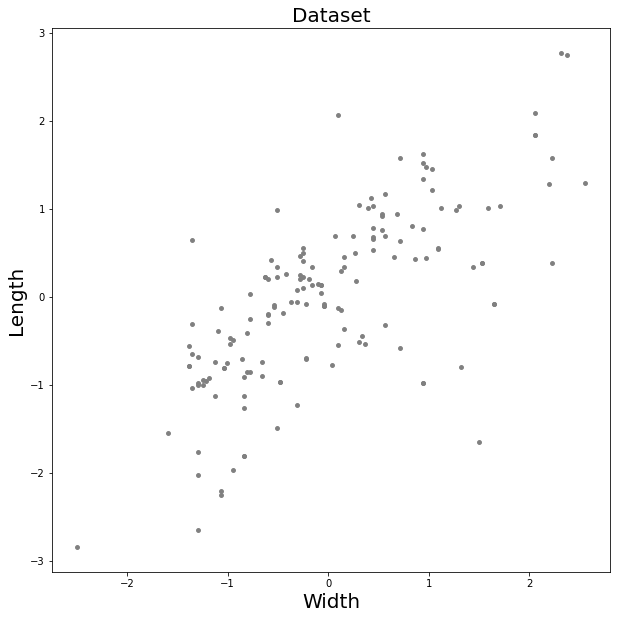

In [ ]:
#plotting clusters
plt.figure(figsize=(10,10))
plt.scatter(df_feat2['Width'],df_feat2['Length'],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Width',fontsize=20)
plt.ylabel('Length',fontsize=20)
plt.show()

## TAsk 2

### Applying DBSCAN without parameters

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df_feat2)

DBSCAN()

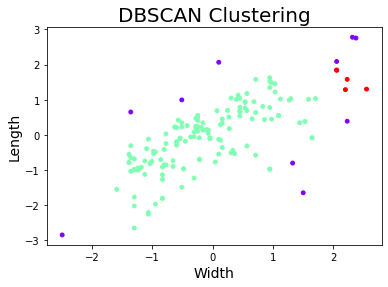

In [ ]:
df_feat2['DBSCAN_labels']=dbscan.labels_
# Plotting resulting clusters
plt.scatter(df_feat2['Width'],df_feat2['Length'],c=df_feat2['DBSCAN_labels'],s=15,cmap='rainbow')
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Width',fontsize=14)
plt.ylabel('Length',fontsize=14)
plt.show()

The datapoints shows 2 clusters and the purple points are the outliers. Here, DBSCAN is run with the default values of hyper parameters

### Evaluate the optimum values of Hyperparameters

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_df1)
distances, indices = nbrs.kneighbors(data_df1)

In [ ]:
distances.shape

(157, 2)

In [ ]:
# Plotting K-distance Graph
import numpy as np
distances = np.sort(distances, axis=0)


Text(0, 0.5, 'Epsilon')

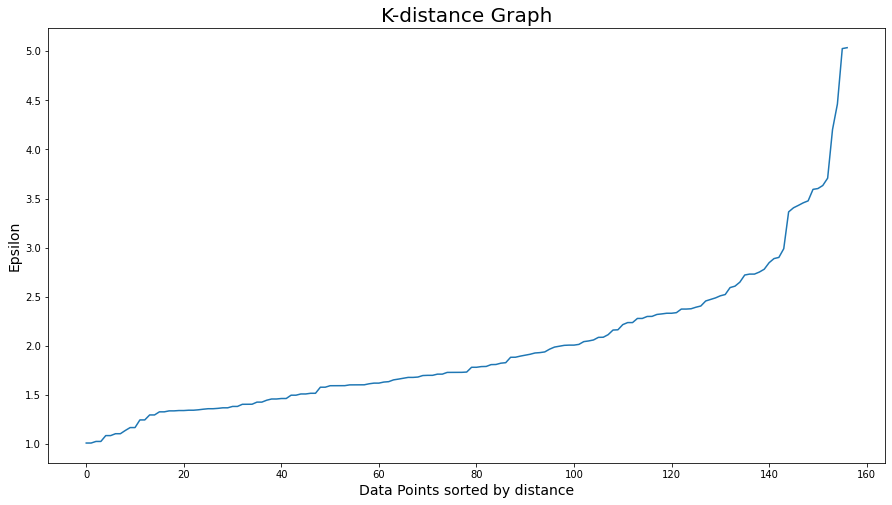

In [ ]:
# distance variable contains an array of distances between a data point and rest of points
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
#plt.axhline(y=0.075, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
#plt.show()

### The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 3.0 in this case. So epsilon can be 3.0


In [ ]:
eps=3.0
K=range(4,10)
for min_samples in K:
  clusterer = DBSCAN(eps=eps, min_samples=min_samples)
  cluster_labels = clusterer.fit_predict(data_df1)
  x= cluster_labels +2
  y = np.bincount(x)
  ii = np.nonzero(y)[0]
  results = list(zip(ii,y[ii]) )
  #print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', (results))
  print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results))

eps= 3.0 | min_samples=  4 | obtained clustering:  2
eps= 3.0 | min_samples=  5 | obtained clustering:  2
eps= 3.0 | min_samples=  6 | obtained clustering:  2
eps= 3.0 | min_samples=  7 | obtained clustering:  2
eps= 3.0 | min_samples=  8 | obtained clustering:  2
eps= 3.0 | min_samples=  9 | obtained clustering:  2


This shows the number of clusters obtained for different values of epsilon.
So, min points can be chosen for value which yielded mimimum clusters. It also depends on domain knowledge

### the hyperparameters obtained are epsilon=3.0 and minpoints=6

### Task 4: Applying DBSCAN algorithm with Hyperparameters to cluster the data

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=3.0,min_samples=6)
dbscan_opt.fit(data_df1)

DBSCAN(eps=3.0, min_samples=6)

In [ ]:
data_df1['DBSCAN_opt_labels']=dbscan_opt.labels_
data_df1['DBSCAN_opt_labels'].value_counts()

 0    133
-1     24
Name: DBSCAN_opt_labels, dtype: int64

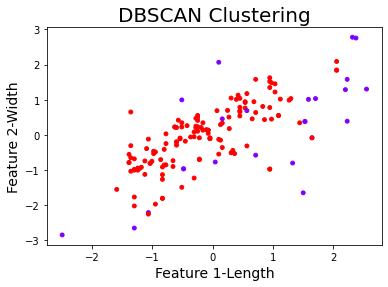

In [ ]:
#df['DBSCAN_labels']=dbscan.labels_
# Plotting resulting clusters
plt.scatter(data_df1['Width'],data_df1['Length'],c=data_df1['DBSCAN_opt_labels'],s=15,cmap='rainbow')
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1-Length',fontsize=14)
plt.ylabel('Feature 2-Width',fontsize=14)
plt.show()

###Inferences:

###
Here, the 2 parameters width and length are considered and the hyperparameters are tuned using the entire dataset.
The plot shows the model has put all the data into a single class with noise present in it


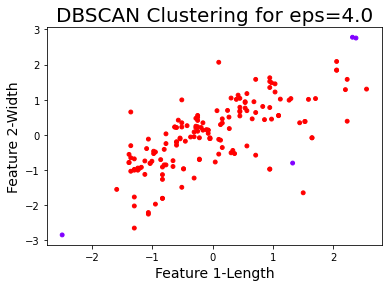

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=4.0,min_samples=6)
dbscan_opt.fit(data_df1)
data_df1['DBSCAN_opt_labels']=dbscan_opt.labels_
data_df1['DBSCAN_opt_labels'].value_counts()
#df['DBSCAN_labels']=dbscan.labels_
# Plotting resulting clusters
plt.scatter(data_df1['Width'],data_df1['Length'],c=data_df1['DBSCAN_opt_labels'],s=15,cmap='rainbow')
plt.title('DBSCAN Clustering for eps=4.0',fontsize=20)
plt.xlabel('Feature 1-Length',fontsize=14)
plt.ylabel('Feature 2-Width',fontsize=14)
plt.show()

The eps values eps=3.0 shows some outliers whereas eps=4.0 has only a single cluster. The modelling is not done properly as all of the data belong to the same class